In [477]:
import json 
import numpy as np
import pandas as pd
import re, nltk, spacy, string
import en_core_web_sm
nlp = en_core_web_sm.load()
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, TfidfTransformer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
# from sklearn.metrics import plot_roc_curve
# from pprint import pprint

In [478]:
# dd = ['het @ dfs@gmail.com is go. dsf \n']

In [479]:
# [  --Character Block setattr
# ^ --Not these character
# \w --word character
# \s --space character
# ] -- character block end

In [480]:
# [re.sub('\S*@\S*\s?','',i)for i in dd]

In [481]:
# [re.sub('\s+',' ',i)for i in dd]

In [482]:
# Import pickle to save and load the model
import pickle

In [483]:
# Import Textblob for extracting noun phrases
# !pip install textblob
from textblob import TextBlob

In [484]:
# Installing wordcloud
# !pip install wordcloud

from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [485]:
# Setting max rows and columns
# pd.set_option('max_columns', 50)
# pd.set_option('max_rows', 50)


In [486]:
# import nltk
# nltk.download('punkt')
# nltk.download('averaged_perceptron_tagger')

In [487]:
import warnings
warnings.filterwarnings('ignore', category=SyntaxWarning)

In [488]:
# Opening JSON file 
f = open(r'D:\lalo\capstone-3\Data\complaints.json') 
  
# returns JSON object as a dictionary 
data = json.load(f)
df=pd.json_normalize(data)

In [489]:
df.head()

,_index,_type,_id,_score,_source.tags,_source.zip_code,_source.complaint_id,_source.issue,_source.date_received,_source.state,...,_source.company_response,_source.company,_source.submitted_via,_source.date_sent_to_company,_source.company_public_response,_source.sub_product,_source.timely,_source.complaint_what_happened,_source.sub_issue,_source.consumer_consent_provided
0,complaint-public-v2,complaint,3211475,0.0,None,90301,3211475,Attempts to collect debt not owed,2019-04-13T12:00:00-05:00,CA,...,Closed with explanation,JPMORGAN CHASE & CO.,Web,2019-04-13T12:00:00-05:00,None,Credit card debt,Yes,,Debt is not yours,Consent not provided
1,complaint-public-v2,complaint,3229299,0.0,Servicemember,319XX,3229299,Written notification about debt,2019-05-01T12:00:00-05:00,GA,...,Closed with explanation,JPMORGAN CHASE & CO.,Web,2019-05-01T12:00:00-05:00,None,Credit card debt,Yes,Good morning my name is XXXX XXXX and I apprec...,Didn't receive enough information to verify debt,Consent provided
2,complaint-public-v2,complaint,3199379,0.0,None,77069,3199379,"Other features, terms, or problems",2019-04-02T12:00:00-05:00,TX,...,Closed with explanation,JPMORGAN CHASE & CO.,Web,2019-04-02T12:00:00-05:00,None,General-purpose credit card or charge card,Yes,I upgraded my XXXX XXXX card in XX/XX/2018 and...,Problem with rewards from credit card,Consent provided
3,complaint-public-v2,complaint,2673060,0.0,None,48066,2673060,Trouble during payment process,2017-09-13T12:00:00-05:00,MI,...,Closed with explanation,JPMORGAN CHASE & CO.,Web,2017-09-14T12:00:00-05:00,None,Conventional home mortgage,Yes,,None,Consent not provided
4,complaint-public-v2,complaint,3203545,0.0,None,10473,3203545,Fees or interest,2019-04-05T12:00:00-05:00,NY,...,Closed with explanation,JPMORGAN CHASE & CO.,Referral,2019-04-05T12:00:00-05:00,None,General-purpose credit card or charge card,Yes,,Charged too much interest,N/A


In [490]:
# df= df.iloc[:50000,:]

In [491]:
df.shape

(78313, 22)

In [492]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78313 entries, 0 to 78312
Data columns (total 22 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   _index                             78313 non-null  object 
 1   _type                              78313 non-null  object 
 2   _id                                78313 non-null  object 
 3   _score                             78313 non-null  float64
 4   _source.tags                       10900 non-null  object 
 5   _source.zip_code                   71556 non-null  object 
 6   _source.complaint_id               78313 non-null  object 
 7   _source.issue                      78313 non-null  object 
 8   _source.date_received              78313 non-null  object 
 9   _source.state                      76322 non-null  object 
 10  _source.consumer_disputed          78313 non-null  object 
 11  _source.product                    78313 non-null  obj

In [493]:
col = df.columns
col

Index(['_index', '_type', '_id', '_score', '_source.tags', '_source.zip_code',
       '_source.complaint_id', '_source.issue', '_source.date_received',
       '_source.state', '_source.consumer_disputed', '_source.product',
       '_source.company_response', '_source.company', '_source.submitted_via',
       '_source.date_sent_to_company', '_source.company_public_response',
       '_source.sub_product', '_source.timely',
       '_source.complaint_what_happened', '_source.sub_issue',
       '_source.consumer_consent_provided'],
      dtype='object')

In [494]:
new_col = [i.split('.')[-1] for i in col]

In [495]:
df.columns = new_col

In [496]:
df.head(1)

,_index,_type,_id,_score,tags,zip_code,complaint_id,issue,date_received,state,...,company_response,company,submitted_via,date_sent_to_company,company_public_response,sub_product,timely,complaint_what_happened,sub_issue,consumer_consent_provided
0,complaint-public-v2,complaint,3211475,0.0,None,90301,3211475,Attempts to collect debt not owed,2019-04-13T12:00:00-05:00,CA,...,Closed with explanation,JPMORGAN CHASE & CO.,Web,2019-04-13T12:00:00-05:00,None,Credit card debt,Yes,,Debt is not yours,Consent not provided


In [497]:
df.isna().sum()

_index                           0
_type                            0
_id                              0
_score                           0
tags                         67413
zip_code                      6757
complaint_id                     0
issue                            0
date_received                    0
state                         1991
consumer_disputed                0
product                          0
company_response                 0
company                          0
submitted_via                    0
date_sent_to_company             0
company_public_response      78309
sub_product                  10571
timely                           0
complaint_what_happened          0
sub_issue                    46297
consumer_consent_provided     1008
dtype: int64

In [498]:
df = df[df['complaint_what_happened'] != '']

In [499]:
df.shape

(21072, 22)

In [500]:
# df['complaint_what_happened'] = df['complaint_what_happened'].astype(str)

In [501]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21072 entries, 1 to 78312
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   _index                     21072 non-null  object 
 1   _type                      21072 non-null  object 
 2   _id                        21072 non-null  object 
 3   _score                     21072 non-null  float64
 4   tags                       3816 non-null   object 
 5   zip_code                   16427 non-null  object 
 6   complaint_id               21072 non-null  object 
 7   issue                      21072 non-null  object 
 8   date_received              21072 non-null  object 
 9   state                      20929 non-null  object 
 10  consumer_disputed          21072 non-null  object 
 11  product                    21072 non-null  object 
 12  company_response           21072 non-null  object 
 13  company                    21072 non-null  object 


In [502]:
# dd = ['het @ dfs@gmail.com 12 i1s 1go. dsf2 \n']
# pattern = '\w*\d \w*'

In [503]:
# [re.sub(pattern, '', i )for i in dd]

In [504]:
def clean_text(sent):
    sent = sent.lower() # Text to lowercase
    pattern = '[^\w\s]' # Removing punctuation
    clean_sent = re.sub(pattern, '', sent) 
    pattern = '\w*\d \w*' # Removing words with numbers in between
    clean_sent = re.sub(pattern, '', clean_sent) 
    return clean_sent

In [505]:
# clean_text('good morning my name / \ . is xxxx xxxx % and i 6 ap 67 preciate ')

In [506]:
df_clean = pd.DataFrame(df['complaint_what_happened'].apply(clean_text))
# dss = pd.DataFrame(df['issue'].apply(clean_text))

In [507]:
df_clean

,complaint_what_happened
1,good morning my name is xxxx xxxx and i apprec...
2,i upgraded my xxxx xxxx card in was told by t...
10,chase card was reported on fraudulent applica...
11,on trying to book a xxxx xxxx ticket i came...
14,my grand son give me check for deposit it int...
...,...
78303,after being a chase card customer for well ove...
78309,on wednesday xxxxxxxx i called chas my xxxx xx...
78310,i am not familiar with xxxx pay and did not un...
78311,i have had flawless credit for ive had chase ...


In [508]:
# pd.concat([df_clean, dss],axis=1)

In [509]:
# df_clean['complaint_what_happened'][2], df['complaint_what_happened'][2]

In [510]:
#Write your function to Lemmatize the texts
def lemmmatize_text(text):
    sent = []
    doc = nlp(text)
    for token in doc:
        sent.append(token.lemma_)
    return " ".join(sent)

In [511]:
df_clean['complaint_lemmatized'] = df_clean['complaint_what_happened'].apply(lemmmatize_text)

In [512]:
# df_clean['complaint_what_happened'][1], df_clean['complaint_lemmatized'][1]

In [513]:
df_clean['complaint_lemmatized'] = df_clean['complaint_lemmatized'].str.replace('xxxx','')

In [514]:
df_clean['complaint_lemmatized']

1        good morning my name be   and I appreciate it ...
2        I upgrade my   card in   be tell by the agent ...
10       chase card be report on   fraudulent applicati...
11       on   try to book a       ticket I come across ...
14       my grand son give I check for   deposit it int...
                               ...                        
78303    after be a chase card customer for well over a...
78309    on wednesday  I call chas my   visa credit car...
78310    I be not familiar with  pay and do not underst...
78311    I have have flawless credit for   I ve have ch...
78312    roughly   ago I close out my account with jp m...
Name: complaint_lemmatized, Length: 21072, dtype: object

In [515]:
#Write your function to extract the POS tags 
def get_POS_tags(text):
    sent = []
    blob = TextBlob(text)
    sent = [word for (word,tag) in blob.tags if tag=='NN']
    return " ".join(sent)

In [516]:
df_clean['complaint_pos'] = df_clean['complaint_lemmatized'].apply(get_POS_tags)

In [517]:
#The clean dataframe should now contain the raw complaint, lemmatized complaint and the complaint after removing POS tags.
df_clean

,complaint_what_happened,complaint_lemmatized,complaint_pos
1,good morning my name is xxxx xxxx and i apprec...,good morning my name be and I appreciate it ...,morning name stop bank cardmember service ask ...
2,i upgraded my xxxx xxxx card in was told by t...,I upgrade my card in be tell by the agent ...,card agent upgrade date agent information orde...
10,chase card was reported on fraudulent applica...,chase card be report on fraudulent applicati...,card application identity consent service cred...
11,on trying to book a xxxx xxxx ticket i came...,on try to book a ticket I come across ...,try book ticket offer ticket card information ...
14,my grand son give me check for deposit it int...,my grand son give I check for deposit it int...,son deposit chase account fund bank account pa...
...,...,...,...
78303,after being a chase card customer for well ove...,after be a chase card customer for well over a...,card customer decade solicitation credit card ...
78309,on wednesday xxxxxxxx i called chas my xxxx xx...,on wednesday I call chas my visa credit car...,wednesday credit card provider claim purchase ...
78310,i am not familiar with xxxx pay and did not un...,I be not familiar with pay and do not underst...,pay risk provide consumer bank app chase mobil...
78311,i have had flawless credit for ive had chase ...,I have have flawless credit for I ve have ch...,credit credit card chase freedom problem balan...


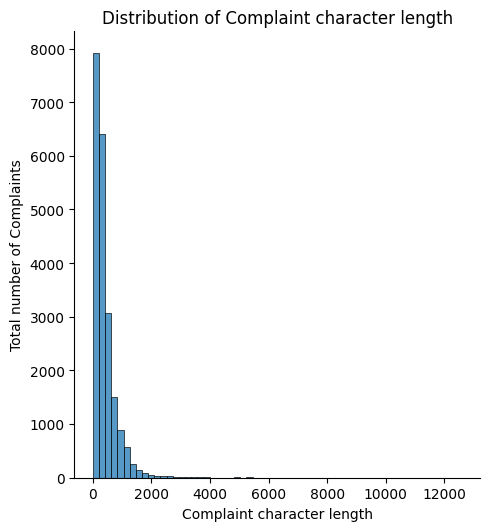

In [518]:
# Write your code here to visualise the data according to the 'Complaint' character length
char_len = [len(each_sent) for each_sent in df_clean['complaint_pos']]

sns.displot(char_len, kind='hist', bins=60)
plt.xlabel("Complaint character length")
plt.ylabel("Total number of Complaints")
plt.title("Distribution of Complaint character length")
plt.show()

In [519]:
# type(char_len)

In [520]:
# print([len(i) for i in df_clean['complaint_pos']])

In [521]:
# l = []
# for i in df_clean['complaint_pos']:
#           l.append(len(i))
# print(l)



In [522]:
# lm = df_clean.reset_index(drop=True)

In [523]:
# lm = df_clean.reset_index(drop=True)['complaint_what_happened'][131:132]

In [524]:
# for i in lm:
     # print(i)

In [525]:
# m = pd.Series(l)
# m[m>2000]

In [526]:
# [i for i in char_len if i > 2000]

In [527]:
# df_clean[len(df_clean['complaint_pos'])> 5000]

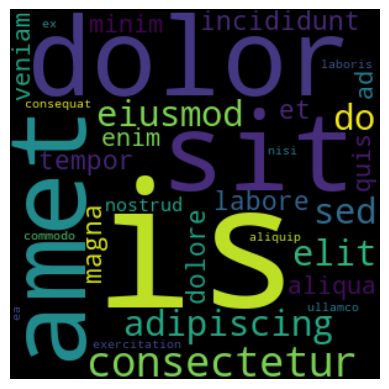

In [528]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

text = "Lorem ipsum is dolor sit amet, consectetur is adipiscing elit, sed is  do eiusmod tempor is incididunt ut labore et dolore magna aliqua. Ut enim ad minim veniam, quis nostrud exercitation ullamco laboris nisi ut aliquip ex ea commodo consequat"
stopwords = set(STOPWORDS)
wc = WordCloud(width = 300, height = 300,
               stopwords = ["lorem", "ipsum", "ut"]) #stopwords)
wc.generate(text)

plt.axis("off")
plt.imshow(wc, interpolation = "bilinear")

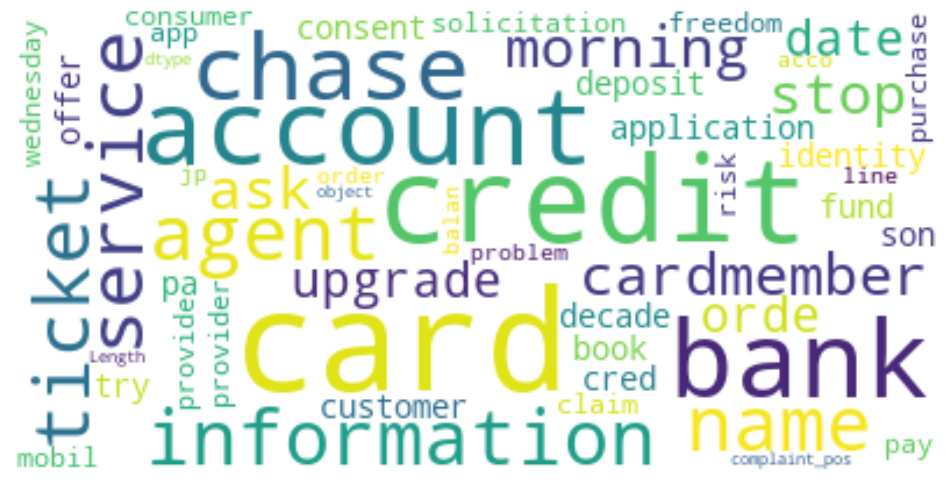

In [529]:
#Using a word cloud find the top 40 words by frequency among all the articles after processing the text
stopwords = set(STOPWORDS)
wordcloud = WordCloud(max_font_size=60, max_words=60, 
                      background_color="white", random_state=100, 
                      stopwords=stopwords).generate(str(df_clean['complaint_pos']))
plt.figure(figsize=[12,12])
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [530]:
#Removing -PRON- from the text corpus
df_clean['Complaint_clean'] = df_clean['complaint_pos'].str.replace('-PRON-', '')

In [531]:
df_clean.to_csv('df_clean.csv')

In [55]:
# A = [len(i) for i in df_clean['complaint_pos']]
# B = [len(i) for i in df_clean['Complaint_clean']]
# c = [a - b for a, b in zip(A, B)]
# for i in c:
#      if i != 0:
#           print(i)

In [56]:
# k =[2,3,'mo']
# l =[6,8,9,6]
# print(list(zip(k,l)))

In [57]:
# dd =' it is good , the work , Do you like this work \n'
# dd =pd.Series(dd)

In [58]:
# dd.str.replace('good', '')

In [59]:
# str(df_clean['complaint_pos'][36:37])

In [60]:
# nltk.tag.pos_tag(str(df_clean['complaint_pos'][36:37]).split()) # noun pronoun verb
# [('I', 'PRP'), ('am', 'VBP'), ('named', 'VBN'), ('John', 'NNP'), ('Doe', 'NNP')]

In [61]:
# pip install wheel


In [62]:
# dd = df_clean['Complaint_clean'][1:3]

In [63]:
# dd = pd.DataFrame({'a':['This is the first document.',
#                         'This document is ramji the second document.',
#                         'And this is and the third one.',
#                         'Is  the first ramji ']})

In [64]:
# dd.a

In [65]:
# dd.a.values.astype("U")

In [66]:
# vec = CountVectorizer( ngram_range=(1,1)).fit(dd.a)
# bagofwords = vec.transform(dd.a)
# sum_words = bagofwords.sum(axis=0)
# words_frequency = [(word, sum_words[0, index]) for word, index in vec.vocabulary_.items()]
# words_frequency = sorted(words_frequency, key = lambda x: x[1], reverse=True)


In [67]:
# vec = CountVectorizer( ngram_range=(2,2)).fit(dd.a)
# vec.vocabulary_

In [68]:
# print(bagofwords)

In [69]:
# sorted(vec.vocabulary_)

In [70]:
# print(vec.vocabulary_) , print(30*'-','\n',sum_words)
# vec = CountVectorizer( ngram_range=(2,2)).fit(dd.a)


In [71]:
# print(type(sum_words))
# print(sum_words.shape)
# sum_words[0]

In [72]:
# vec.vocabulary_.items()

In [73]:
# [(word, sum_words[0, index]) for word, index in vec.vocabulary_.items()]

In [74]:
# sorted(words_frequency, key = lambda x: x[1], reverse=True)

In [75]:
# Creating a function to extract top ngrams(unigram/bigram/trigram) based on the function inputs
def get_top_ngrams(text, n=None, ngram=(1,1)):
  vec = CountVectorizer(stop_words='english', ngram_range=ngram).fit(text)
  bagofwords = vec.transform(text)
  sum_words = bagofwords.sum(axis=0)
  words_frequency = [(word, sum_words[0, index]) for word, index in vec.vocabulary_.items()]
  words_frequency = sorted(words_frequency, key = lambda x: x[1], reverse=True)
  return words_frequency[:n]

In [76]:
# df_clean['Complaint_clean'].values.astype('U')

In [427]:
top_30words = get_top_ngrams(df_clean['Complaint_clean'].values.astype('U'), n=30, ngram=(1,1))
df_unigram = pd.DataFrame(top_30words, columns=['unigram', 'count'])
df_unigram

,unigram,count
0,account,47326
1,chase,46155
2,credit,33609
3,card,29103
4,bank,28355
5,payment,20780
6,time,15303
7,charge,14497
8,check,12110
9,money,11942


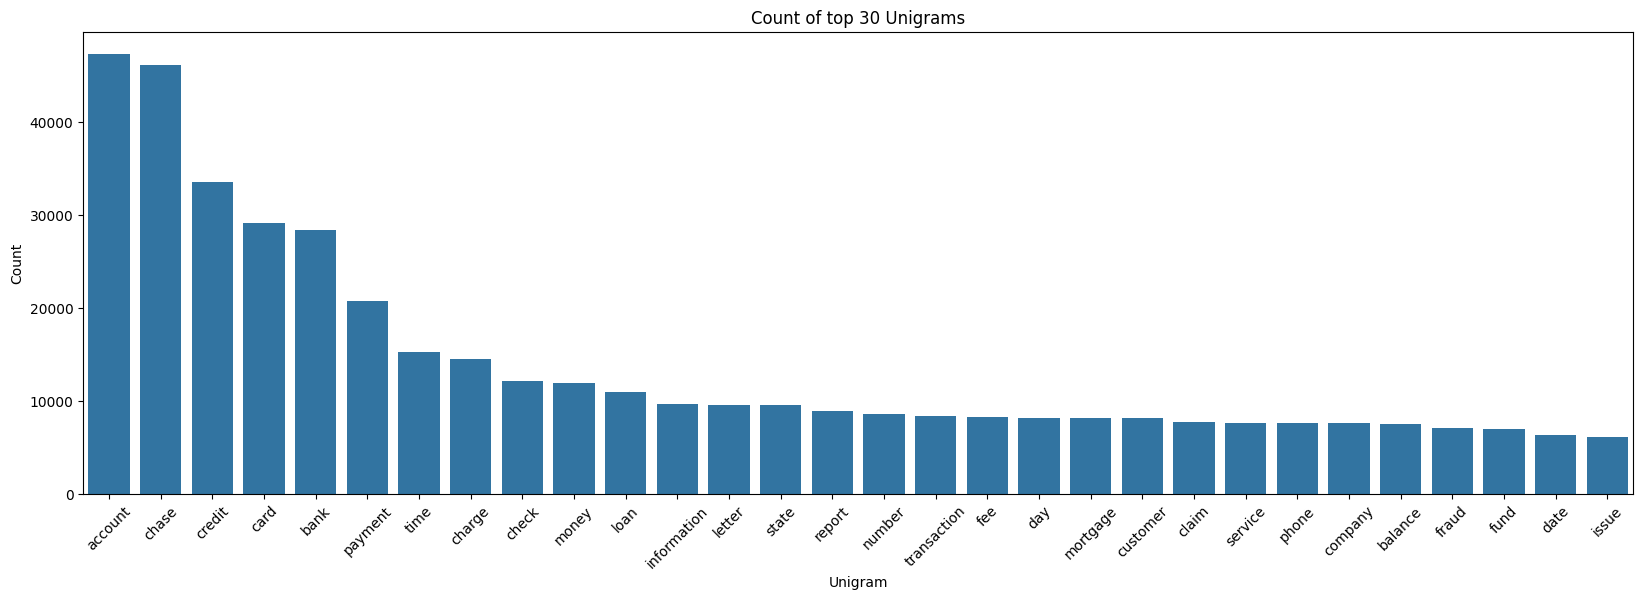

In [428]:
# Plotting top 30 Unigrams
plt.figure(figsize=[20,6])
sns.barplot(x=df_unigram['unigram'], y=df_unigram['count'])
plt.xticks(rotation=45)
plt.xlabel("Unigram")
plt.ylabel("Count")
plt.title("Count of top 30 Unigrams")
plt.show()

In [429]:
#Print the top 10 words in the unigram frequency
df_unigram.head(10)

,unigram,count
0,account,47326
1,chase,46155
2,credit,33609
3,card,29103
4,bank,28355
5,payment,20780
6,time,15303
7,charge,14497
8,check,12110
9,money,11942


In [430]:
#Write your code here to find the top 30 bigram frequency among the complaints in the cleaned datafram(df_clean). 
top_30words = get_top_ngrams(df_clean['Complaint_clean'].values.astype('U'), n=30, ngram=(2,2))
df_bigram = pd.DataFrame(top_30words, columns=['bigram', 'count'])
df_bigram

,bigram,count
0,credit card,12665
1,credit report,3945
2,customer service,3072
3,chase credit,2961
4,chase bank,2948
5,bank account,2763
6,account chase,2736
7,chase account,2612
8,account account,2612
9,check account,2478


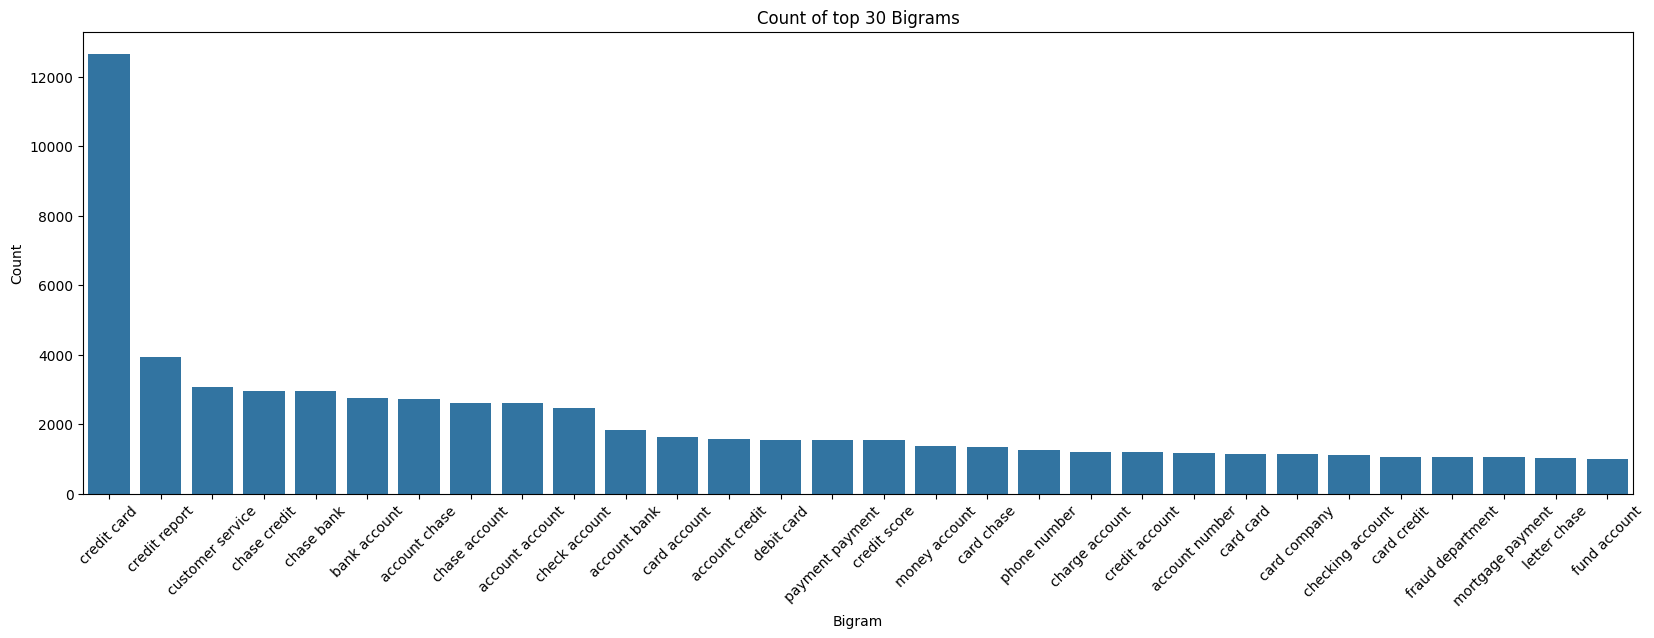

In [431]:
# Plotting top 30 Bigrams
plt.figure(figsize=[20,6])
sns.barplot(x=df_bigram['bigram'], y=df_bigram['count'])
plt.xticks(rotation=45)
plt.xlabel("Bigram")
plt.ylabel("Count")
plt.title("Count of top 30 Bigrams")
plt.show()

In [432]:
#Write your code here to find the top 30 trigram frequency among the complaints in the cleaned datafram(df_clean). 
top_30words = get_top_ngrams(df_clean['Complaint_clean'].values.astype('U'), n=30, ngram=(3,3))
df_trigram = pd.DataFrame(top_30words, columns=['trigram', 'count'])
df_trigram

,trigram,count
0,chase credit card,2045
1,credit card account,1017
2,credit card company,995
3,credit card chase,649
4,credit card credit,535
5,inquiry credit report,482
6,account credit card,417
7,charge credit card,415
8,card credit card,407
9,credit reporting agency,373


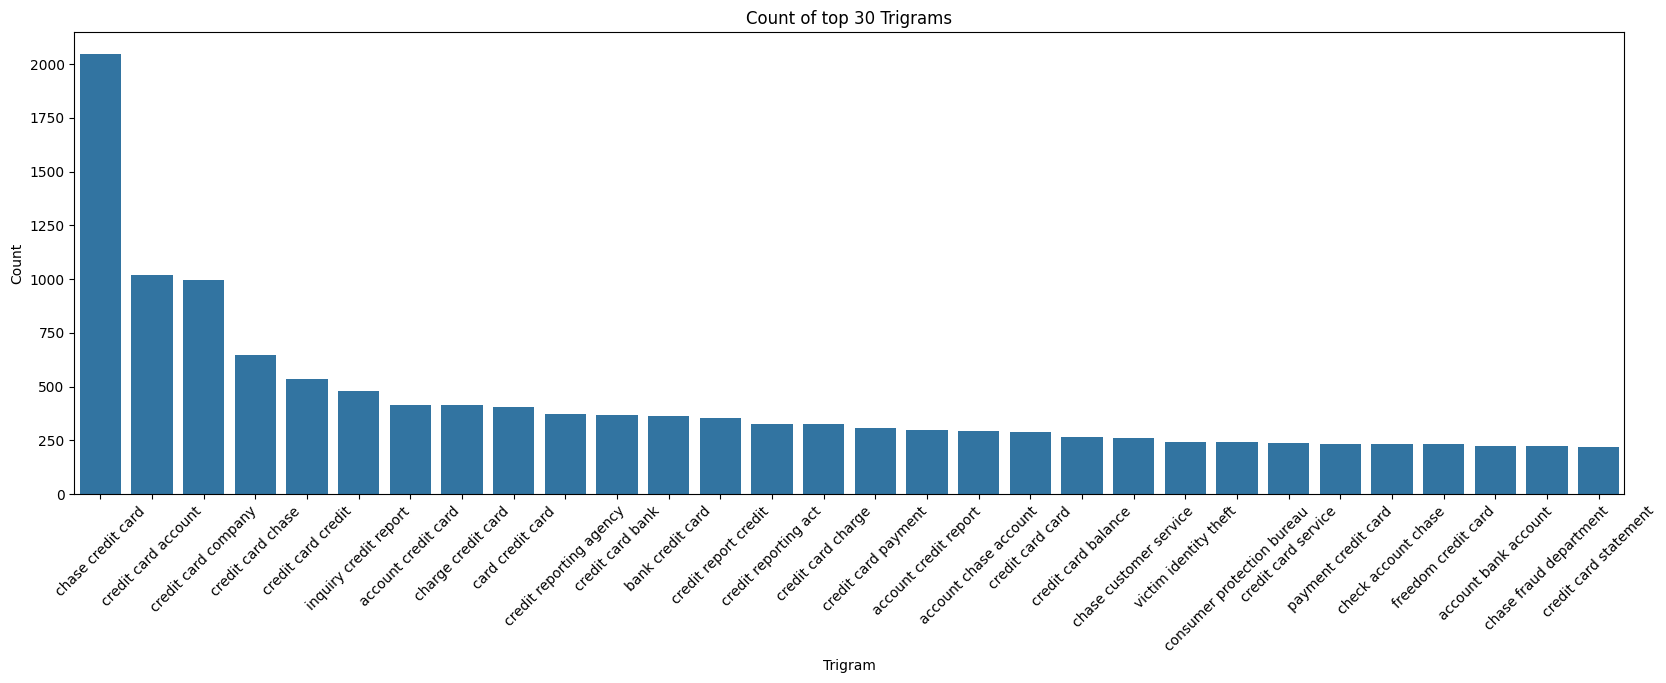

In [433]:
plt.figure(figsize=[20,6])
sns.barplot(x=df_trigram['trigram'], y=df_trigram['count'])
plt.xticks(rotation=45)
plt.xlabel("Trigram")
plt.ylabel("Count")
plt.title("Count of top 30 Trigrams")
plt.show()

In [434]:
#Write your code here to initialise the TfidfVectorizer 
tfidf = TfidfVectorizer(min_df=2, max_df=0.95, stop_words='english')

In [435]:
#Write your code here to create the Document Term Matrix by transforming the complaints column present in df_clean.
dtm = tfidf.fit_transform(df_clean['Complaint_clean'])

In [437]:
dtm

<21072x7243 sparse matrix of type '<class 'numpy.float64'>'
	with 636304 stored elements in Compressed Sparse Row format>

In [87]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import spacy

In [88]:
# Nlp = spacy.load('en_core_web_sm')

In [89]:
# def preprocess(text):
#      doc = Nlp(text)
#      processed_token = [token.lemma_ for token in doc if not token.is_stop and token.is_alpha]
#      return ' '.join(processed_token)

In [438]:
vecto = TfidfVectorizer()
X = vecto.fit_transform(df_clean['Complaint_clean'])
lda = LatentDirichletAllocation(n_components=5)
lda.fit(X)
print(lda.components_)


[[0.20001076 0.20001005 0.20155936 ... 2.08656245 0.21092131 0.43277828]
 [0.20009734 0.70639148 0.20002697 ... 0.20058858 0.36167422 0.2001166 ]
 [0.20005923 0.200052   0.2000185  ... 0.20008722 0.20006834 0.20145963]
 [0.49396532 0.22686531 0.20000372 ... 2.84138255 0.20001608 0.20001539]
 [0.20012788 0.20010638 0.42095429 ... 0.20070866 0.20014753 0.20014184]]


In [93]:
for ixd, topic in enumerate(lda.components_):
     print(f'Topic{ixd +1}:')
     top_words_idx = topic.argsort()[::-1][:15]
     top_words = [vecto.get_feature_names_out()[i] for i in top_words_idx]
     print(', '.join(top_words))
     

Topic1:
loan, mortgage, payment, chase, home, modification, property, bank, time, rate, interest, letter, house, sale, debt
Topic2:
malfunction, autobill, machine, pm, casino, below, refrigerator, headset, quarter, temp, glass, stone, currency, hair, fo
Topic3:
debt, thought, bankruptcy, collector, cease, collection, limitation, jpmchase, desist, violate, statute, validation, bureaus, statue, cheque
Topic4:
credit, card, account, chase, charge, report, payment, inquiry, balance, dispute, company, bank, fee, time, letter
Topic5:
account, bank, check, money, chase, fund, transaction, deposit, claim, card, branch, number, day, fraud, fee


In [94]:
from sklearn.decomposition import NMF

In [95]:
#Load your nmf_model with the n_components i.e 5
num_topics = 5

#keep the random_state =40
nmf_model = NMF(n_components=num_topics, random_state=40)

In [96]:
nmf_model.fit(dtm)
len(tfidf.get_feature_names_out())

7243

In [97]:

lda = LatentDirichletAllocation(n_components=5)
lda.fit(dtm)
print(lda.components_)

[[0.73910638 2.65780764 0.2000317  ... 0.20001851 1.64099738 0.20289927]
 [0.20001019 0.52213647 1.31619784 ... 0.20001008 1.34540436 0.43531545]
 [0.2000462  0.20054446 0.20008607 ... 0.20004638 0.20009182 0.20445381]
 [0.20006388 0.20019738 0.20220189 ... 0.83782875 0.20135118 0.20009863]
 [0.20377026 0.2671546  0.34084658 ... 0.31153472 2.26758396 0.20003346]]


In [98]:
L = lda.components_

In [99]:
L.shape

(5, 7243)

In [100]:
H = nmf_model.components_       # Topic-term matrix
H.shape

(5, 7243)

In [473]:
words = np.array(tfidf.get_feature_names_out())
topic_words = pd.DataFrame(np.zeros((num_topics, 15)), index=[f'Topic {i + 1}' for i in range(num_topics)],
                           columns=[f'Word {i + 1}' for i in range(15)]).astype(str)

for i in range(num_topics):
    ix = L[i].argsort()[::-1][:15]
    topic_words.iloc[i] = words[ix]

topic_words

,Word 1,Word 2,Word 3,Word 4,Word 5,Word 6,Word 7,Word 8,Word 9,Word 10,Word 11,Word 12,Word 13,Word 14,Word 15
Topic 1,card,credit,account,chase,payment,balance,charge,fee,report,time,statement,bank,month,company,letter
Topic 2,account,bank,check,chase,money,charge,transaction,card,fund,claim,deposit,fraud,number,day,branch
Topic 3,credit,inquiry,report,account,card,identity,information,theft,company,debt,reporting,bank,chase,victim,inquire
Topic 4,car,loan,auto,vehicle,payment,lease,finance,coupon,dealership,student,title,chase,bank,account,cd
Topic 5,loan,mortgage,payment,chase,home,modification,property,bank,time,house,sale,foreclosure,rate,document,letter


In [474]:
#Print the Top15 words for each of the topics
words = np.array(tfidf.get_feature_names_out())
topic_words = pd.DataFrame(np.zeros((num_topics, 15)), index=[f'Topic {i + 1}' for i in range(num_topics)],
                           columns=[f'Word {i + 1}' for i in range(15)]).astype(str)
for i in range(num_topics):
    ix = H[i].argsort()[::-1][:15]
    topic_words.iloc[i] = words[ix]

topic_words

,Word 1,Word 2,Word 3,Word 4,Word 5,Word 6,Word 7,Word 8,Word 9,Word 10,Word 11,Word 12,Word 13,Word 14,Word 15
Topic 1,account,bank,check,money,fund,chase,deposit,branch,day,number,transaction,customer,transfer,claim,business
Topic 2,credit,card,report,inquiry,chase,account,score,company,information,debt,limit,application,letter,balance,reporting
Topic 3,payment,balance,month,fee,statement,time,auto,date,pay,credit,chase,account,mortgage,car,error
Topic 4,charge,card,chase,dispute,transaction,fee,merchant,fraud,claim,purchase,service,time,refund,statement,company
Topic 5,loan,mortgage,home,modification,chase,property,letter,rate,document,time,bank,house,foreclosure,sale,information


**Observation**
Looking at the topics above, for each topic, we can give a label based on their products/services:

- Topic 1 = Bank account services
- Topic 2 = Credit card / Prepaid card
- Topic 3 = Others
- Topic 4 = Theft/Dispute reporting
- Topic 5 = Mortgages/loans

In [103]:
#Create the best topic for each complaint in terms of integer value 0,1,2,3 & 4
topic_results = nmf_model.transform(dtm)

In [104]:
#Assign the best topic to each of the cmplaints in Topic Column
df_clean['Topic'] = topic_results.argmax(axis=1)

In [105]:
#Print the first 5 Complaint for each of the Topics
df_clean_5=df_clean.groupby('Topic').head(5)
df_clean_5.sort_values('Topic')

,complaint_what_happened,complaint_lemmatized,complaint_pos,Complaint_clean,Topic
1,good morning my name is xxxx xxxx and i apprec...,good morning my name be and I appreciate it ...,morning name stop bank cardmember service ask ...,morning name stop bank cardmember service ask ...,0
14,my grand son give me check for deposit it int...,my grand son give I check for deposit it int...,son deposit chase account fund bank account pa...,son deposit chase account fund bank account pa...,0
17,with out notice jp morgan chase restricted my ...,with out notice jp morgan chase restrict my ac...,jp chase account debit card tuesday thursday b...,jp chase account debit card tuesday thursday b...,0
24,mishandling of this account by chase auto and ...,mishandle of this account by chase auto and,mishandle account auto,mishandle account auto,0
27,i opened an account with chase bank on xxxx an...,I open an account with chase bank on and use ...,account bank code bonus term everything accoun...,account bank code bonus term everything accoun...,0
2,i upgraded my xxxx xxxx card in was told by t...,I upgrade my card in be tell by the agent ...,card agent upgrade date agent information orde...,card agent upgrade date agent information orde...,1
10,chase card was reported on fraudulent applica...,chase card be report on fraudulent applicati...,card application identity consent service cred...,card application identity consent service cred...,1
11,on trying to book a xxxx xxxx ticket i came...,on try to book a ticket I come across ...,try book ticket offer ticket card information ...,try book ticket offer ticket card information ...,1
15,can you please remove inquiry,can you please remove inquiry,inquiry,inquiry,1
23,i have a chase credit card which is incorrectl...,I have a chase credit card which be incorrectl...,chase credit card datum credit report company ...,chase credit card datum credit report company ...,1


In [106]:
#Create the dictionary of Topic names and Topics
Topic_names = { 0:"Bank account services", 1:"Credit card / Prepaid card", 2:"Others",
               3:"Theft/Dispute reporting", 4:"Mortgages/loans" }
#Replace Topics with Topic Names
df_clean['Topic'] = df_clean['Topic'].map(Topic_names)

In [107]:
df_clean.shape

(21072, 5)

In [108]:
df_clean.head()

,complaint_what_happened,complaint_lemmatized,complaint_pos,Complaint_clean,Topic
1,good morning my name is xxxx xxxx and i apprec...,good morning my name be and I appreciate it ...,morning name stop bank cardmember service ask ...,morning name stop bank cardmember service ask ...,Bank account services
2,i upgraded my xxxx xxxx card in was told by t...,I upgrade my card in be tell by the agent ...,card agent upgrade date agent information orde...,card agent upgrade date agent information orde...,Credit card / Prepaid card
10,chase card was reported on fraudulent applica...,chase card be report on fraudulent applicati...,card application identity consent service cred...,card application identity consent service cred...,Credit card / Prepaid card
11,on trying to book a xxxx xxxx ticket i came...,on try to book a ticket I come across ...,try book ticket offer ticket card information ...,try book ticket offer ticket card information ...,Credit card / Prepaid card
14,my grand son give me check for deposit it int...,my grand son give I check for deposit it int...,son deposit chase account fund bank account pa...,son deposit chase account fund bank account pa...,Bank account services


In [109]:
#Keep the columns"complaint_what_happened" & "Topic" only in the new dataframe --> training_data
training_data = df_clean[['complaint_what_happened', 'Topic']]

In [110]:
training_data

,complaint_what_happened,Topic
1,good morning my name is xxxx xxxx and i apprec...,Bank account services
2,i upgraded my xxxx xxxx card in was told by t...,Credit card / Prepaid card
10,chase card was reported on fraudulent applica...,Credit card / Prepaid card
11,on trying to book a xxxx xxxx ticket i came...,Credit card / Prepaid card
14,my grand son give me check for deposit it int...,Bank account services
...,...,...
78303,after being a chase card customer for well ove...,Credit card / Prepaid card
78309,on wednesday xxxxxxxx i called chas my xxxx xx...,Theft/Dispute reporting
78310,i am not familiar with xxxx pay and did not un...,Theft/Dispute reporting
78311,i have had flawless credit for ive had chase ...,Others


In [111]:
#Write your code to get the Vector count
vect = CountVectorizer()
X_train_cnt = vect.fit_transform(training_data['complaint_what_happened'])

# Save word vector
pickle.dump(vect.vocabulary_, open("count_vector.pk1", "wb"))

In [112]:
#Write your code here to transform the word vector to tf-idf
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_cnt)

# Save tfidf
pickle.dump(tfidf_transformer, open('tfidf.pk1', "wb"))

In [113]:
# Importing LogisticRegression from sklearn
from sklearn.linear_model import LogisticRegression
# Importing Train, Test Split
from sklearn.model_selection import train_test_split

In [114]:
# Train, Test Split
X_train, X_test, y_train, y_test = train_test_split(X_train_tfidf, training_data['Topic'], test_size=0.25, random_state=42)

In [115]:
logreg = LogisticRegression(random_state=42, solver='liblinear').fit(X_train, y_train)

In [116]:
# Getting the score of the base model
logreg.score(X_test, y_test)

0.9178056188306758

In [117]:
logreg_grid = {"C": [100, 10, 5, 4, 3, 2, 1, 1.0, 0.1, 0.01],
                "solver": ["liblinear"]}

In [118]:
# Setup grid hyperparameter search for LogisticRegression
logreg_hpt = GridSearchCV(LogisticRegression(random_state=42),
                                param_grid=logreg_grid,
                                cv=5,
                                verbose=True,
                                n_jobs=-1)

# Fit random hyperparameter search model
logreg_hpt.fit(X_train, y_train);

Fitting 5 folds for each of 10 candidates, totalling 50 fits


In [119]:
# Check best parameters
logreg_hpt.best_params_

{'C': 4, 'solver': 'liblinear'}

In [120]:
# Evaluating the tuned model
logreg_hpt.score(X_test, y_test)

0.9210326499620349

In [121]:
# Save Logistic Regression Model
pickle.dump(logreg_hpt, open("logreg_model.pk1", "wb"))

In [122]:
# Load pickled model
logreg_model = pickle.load(open("logreg_model.pk1", "rb"))

In [123]:
# Make predictions on test data
y_pred = logreg_model.predict(X_test)

In [124]:
# Print Confusion Matrix
print(confusion_matrix(y_test, y_pred))

[[1230   20   14    7   34]
 [  18 1181   10    5   46]
 [  22   23  840    9   13]
 [  11   18   20  498   20]
 [  64   41   17    4 1103]]


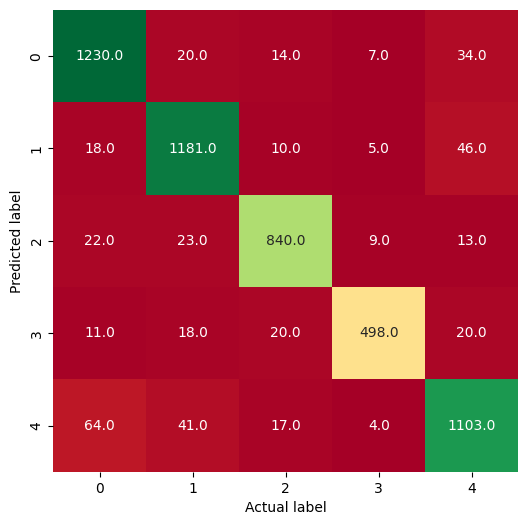

In [125]:
# Visualize Confusion Matrix with heatmap
fig, ax = plt.subplots(figsize=(6, 6))
ax = sns.heatmap(confusion_matrix(y_test, y_pred),
                 annot=True,
                 cbar=False,
                 cmap="RdYlGn", fmt = '0.1f')
plt.xlabel("Actual label")
plt.ylabel("Predicted label")
plt.show()

In [126]:
Topicnames_target = ["Bank account services", "Credit card / Prepaid card", "Others", "Theft/Dispute reporting", "Mortgages/loans"]

In [127]:
# Print Classification Report
print(classification_report(y_test, y_pred, target_names = Topicnames_target))

                            precision    recall  f1-score   support

     Bank account services       0.91      0.94      0.93      1305
Credit card / Prepaid card       0.92      0.94      0.93      1260
                    Others       0.93      0.93      0.93       907
   Theft/Dispute reporting       0.95      0.88      0.91       567
           Mortgages/loans       0.91      0.90      0.90      1229

                  accuracy                           0.92      5268
                 macro avg       0.93      0.92      0.92      5268
              weighted avg       0.92      0.92      0.92      5268



In [128]:
# Train, Test Split
X_train, X_test, y_train, y_test = train_test_split(X_train_tfidf, training_data['Topic'], test_size=0.25, random_state=42)

In [129]:
# Importing DecisionTreeClassifier from sklearn
from sklearn.tree import DecisionTreeClassifier

In [130]:
dt = DecisionTreeClassifier(random_state=42).fit(X_train, y_train)

In [131]:
# Getting the score of the base model
dt.score(X_test, y_test)

0.7839787395596052

In [132]:
dt_grid = {"max_depth": [3, 5, 10],
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2)}

In [135]:
# Setup grid hyperparameter search for DecisionTreeClassifier
dt_hpt = GridSearchCV(DecisionTreeClassifier(random_state=42),
                                param_grid=dt_grid,
                                cv=5,
                                verbose=True,
                                n_jobs=-1)

# Fit random hyperparameter search model
dt_hpt.fit(X_train, y_train);

Fitting 5 folds for each of 270 candidates, totalling 1350 fits


In [136]:
# Check best parameters
dt_hpt.best_params_

{'max_depth': 10, 'min_samples_leaf': 11, 'min_samples_split': 2}

In [137]:
# Save DecisionTreeClassifier Model
pickle.dump(dt_hpt, open("dt_model.pk1", "wb"))

In [138]:
# Load pickled model
dt_model = pickle.load(open("dt_model.pk1", "rb"))

In [139]:
# Make predictions on test data
y_pred = dt_model.predict(X_test)

In [140]:
print(confusion_matrix(y_test, y_pred))

[[1023   66   26   21  169]
 [  39 1035   21   13  152]
 [  35   17  663   26  166]
 [  45   43   35  407   37]
 [ 161  119   16   20  913]]


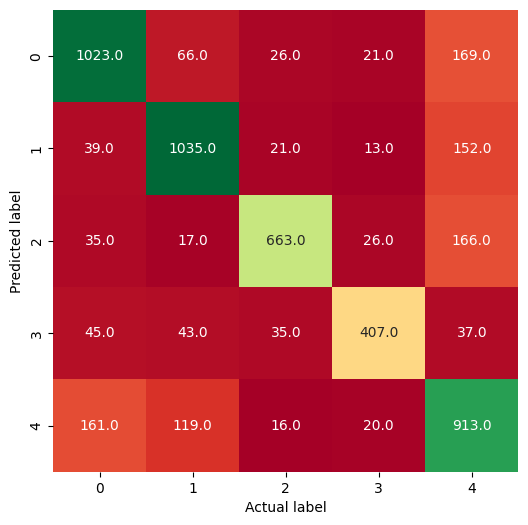

In [141]:
# Visualize Confusion Matrix with heatmap
fig, ax = plt.subplots(figsize=(6, 6))
ax = sns.heatmap(confusion_matrix(y_test, y_pred),
                 annot=True,
                 cbar=False,
                 cmap="RdYlGn", fmt = '0.1f')
plt.xlabel("Actual label")
plt.ylabel("Predicted label")
plt.show()

In [142]:
Topicnames_target = ["Bank account services", "Credit card / Prepaid card", "Others", "Theft/Dispute reporting", "Mortgages/loans"]

In [143]:
# Print Classification Report
print(classification_report(y_test, y_pred, target_names = Topicnames_target))

                            precision    recall  f1-score   support

     Bank account services       0.79      0.78      0.78      1305
Credit card / Prepaid card       0.81      0.82      0.81      1260
                    Others       0.87      0.73      0.79       907
   Theft/Dispute reporting       0.84      0.72      0.77       567
           Mortgages/loans       0.64      0.74      0.68      1229

                  accuracy                           0.77      5268
                 macro avg       0.79      0.76      0.77      5268
              weighted avg       0.78      0.77      0.77      5268



In [144]:
# Importing Random Forest Classifier from sklearn
from sklearn.ensemble import RandomForestClassifier
# Importing Train, Test Split
from sklearn.model_selection import train_test_split

In [145]:
# Train, Test Split
X_train, X_test, y_train, y_test = train_test_split(X_train_tfidf, training_data['Topic'], test_size=0.25, random_state=42)

In [146]:
rf = RandomForestClassifier(random_state=42).fit(X_train, y_train)

In [147]:
# Getting the score of the base model
rf.score(X_test, y_test)

0.8054290053151101

In [148]:
rf_grid = {"n_estimators": np.arange(10, 1000, 50),
           "max_depth": [3, 5, 10],
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2)}

In [149]:
# Setup random hyperparameter search for Random Forest
rf_hpt = RandomizedSearchCV(RandomForestClassifier(random_state=42),
                                param_distributions=rf_grid,
                                cv=5,
                                verbose=True,
                                n_jobs=-1)

# Fit random hyperparameter search model
rf_hpt.fit(X_train, y_train);

Fitting 5 folds for each of 10 candidates, totalling 50 fits


In [150]:
# Check best parameters
rf_hpt.best_params_

{'n_estimators': 860,
 'min_samples_split': 12,
 'min_samples_leaf': 1,
 'max_depth': 10}

In [151]:
# Evaluating the tuned model
rf_hpt.score(X_test, y_test)

0.7355732725892179

In [152]:
rf_grid = {"n_estimators": [200, 260, 300],
           "max_depth": [7, 10, 15],
           "min_samples_split": [10, 12, 14],
           "min_samples_leaf": [6, 8, 10]}

In [153]:
# # Setup grid hyperparameter search for Random Forest
# rf_hpt = GridSearchCV(RandomForestClassifier(random_state=42),
#                                 param_grid=rf_grid,
#                                 cv=5,
#                                 verbose=True,
#                                 n_jobs=-1)

# # Fit random hyperparameter search model
# rf_hpt.fit(X_train, y_train);

In [154]:
# Check best parameters
rf_hpt.best_params_

{'n_estimators': 860,
 'min_samples_split': 12,
 'min_samples_leaf': 1,
 'max_depth': 10}

In [155]:
# Evaluating the tuned model
rf_hpt.score(X_test, y_test)

0.7355732725892179

In [156]:
# Save Random Forest Model
pickle.dump(rf_hpt, open("rf_model.pk1", "wb"))

In [157]:
# Load pickled model
rf_model = pickle.load(open("rf_model.pk1", "rb"))

In [158]:
# Make predictions on test data
y_pred = rf_model.predict(X_test)

In [159]:
# Print Confusion Matrix
print(confusion_matrix(y_test, y_pred))

[[1187   81    4    0   33]
 [  71 1066    3    0  120]
 [  80  128  677    0   22]
 [ 155  202   92    4  114]
 [ 160  124    4    0  941]]


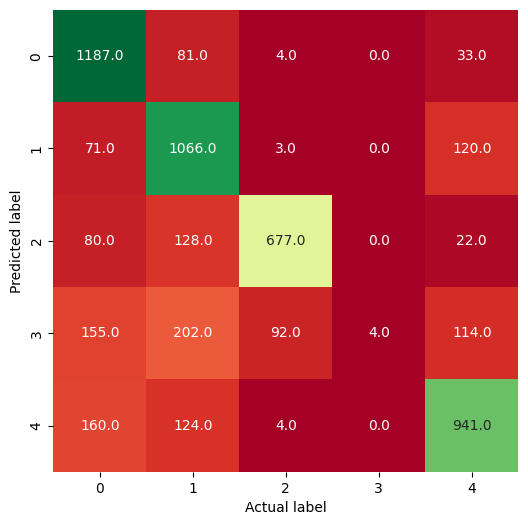

In [160]:
# Visualize Confusion Matrix with heatmap
fig, ax = plt.subplots(figsize=(6, 6))
ax = sns.heatmap(confusion_matrix(y_test, y_pred),
                 annot=True,
                 cbar=False,
                 cmap="RdYlGn", fmt = '0.1f')
plt.xlabel("Actual label")
plt.ylabel("Predicted label")
plt.show()

In [161]:
Topicnames_target = ["Bank account services", "Credit card / Prepaid card", "Others", "Theft/Dispute reporting", "Mortgages/loans"]

In [162]:
# Print Classification Report
print(classification_report(y_test, y_pred, target_names = Topicnames_target))

                            precision    recall  f1-score   support

     Bank account services       0.72      0.91      0.80      1305
Credit card / Prepaid card       0.67      0.85      0.75      1260
                    Others       0.87      0.75      0.80       907
   Theft/Dispute reporting       1.00      0.01      0.01       567
           Mortgages/loans       0.77      0.77      0.77      1229

                  accuracy                           0.74      5268
                 macro avg       0.80      0.65      0.63      5268
              weighted avg       0.77      0.74      0.70      5268



In [163]:
#Create the best topic for each complaint in terms of integer value 0,1,2,3 & 4
topic_results = nmf_model.transform(dtm)

In [164]:
#Assign the best topic to each of the cmplaints in Topic Column
df_clean['Topic'] = topic_results.argmax(axis=1)

In [165]:
#Print the first 5 Complaint for each of the Topics
df_clean_5=df_clean.groupby('Topic').head(5)
df_clean_5.sort_values('Topic')

,complaint_what_happened,complaint_lemmatized,complaint_pos,Complaint_clean,Topic
1,good morning my name is xxxx xxxx and i apprec...,good morning my name be and I appreciate it ...,morning name stop bank cardmember service ask ...,morning name stop bank cardmember service ask ...,0
14,my grand son give me check for deposit it int...,my grand son give I check for deposit it int...,son deposit chase account fund bank account pa...,son deposit chase account fund bank account pa...,0
17,with out notice jp morgan chase restricted my ...,with out notice jp morgan chase restrict my ac...,jp chase account debit card tuesday thursday b...,jp chase account debit card tuesday thursday b...,0
24,mishandling of this account by chase auto and ...,mishandle of this account by chase auto and,mishandle account auto,mishandle account auto,0
27,i opened an account with chase bank on xxxx an...,I open an account with chase bank on and use ...,account bank code bonus term everything accoun...,account bank code bonus term everything accoun...,0
2,i upgraded my xxxx xxxx card in was told by t...,I upgrade my card in be tell by the agent ...,card agent upgrade date agent information orde...,card agent upgrade date agent information orde...,1
10,chase card was reported on fraudulent applica...,chase card be report on fraudulent applicati...,card application identity consent service cred...,card application identity consent service cred...,1
11,on trying to book a xxxx xxxx ticket i came...,on try to book a ticket I come across ...,try book ticket offer ticket card information ...,try book ticket offer ticket card information ...,1
15,can you please remove inquiry,can you please remove inquiry,inquiry,inquiry,1
23,i have a chase credit card which is incorrectl...,I have a chase credit card which be incorrectl...,chase credit card datum credit report company ...,chase credit card datum credit report company ...,1


In [166]:
#Create the dictionary of Topic names and Topics
Topic_names = { 0:"Bank account services", 1:"Credit card / Prepaid card", 2:"Others",
               3:"Theft/Dispute reporting", 4:"Mortgages/loans" }
#Replace Topics with Topic Names
df_clean['Topic'] = df_clean['Topic'].map(Topic_names)

In [167]:
df_clean.shape

(21072, 5)

In [168]:
df_clean.head()

,complaint_what_happened,complaint_lemmatized,complaint_pos,Complaint_clean,Topic
1,good morning my name is xxxx xxxx and i apprec...,good morning my name be and I appreciate it ...,morning name stop bank cardmember service ask ...,morning name stop bank cardmember service ask ...,Bank account services
2,i upgraded my xxxx xxxx card in was told by t...,I upgrade my card in be tell by the agent ...,card agent upgrade date agent information orde...,card agent upgrade date agent information orde...,Credit card / Prepaid card
10,chase card was reported on fraudulent applica...,chase card be report on fraudulent applicati...,card application identity consent service cred...,card application identity consent service cred...,Credit card / Prepaid card
11,on trying to book a xxxx xxxx ticket i came...,on try to book a ticket I come across ...,try book ticket offer ticket card information ...,try book ticket offer ticket card information ...,Credit card / Prepaid card
14,my grand son give me check for deposit it int...,my grand son give I check for deposit it int...,son deposit chase account fund bank account pa...,son deposit chase account fund bank account pa...,Bank account services


In [169]:
#Keep the columns"complaint_what_happened" & "Topic" only in the new dataframe --> training_data
training_data = df_clean[['complaint_what_happened', 'Topic']]

In [170]:
training_data

,complaint_what_happened,Topic
1,good morning my name is xxxx xxxx and i apprec...,Bank account services
2,i upgraded my xxxx xxxx card in was told by t...,Credit card / Prepaid card
10,chase card was reported on fraudulent applica...,Credit card / Prepaid card
11,on trying to book a xxxx xxxx ticket i came...,Credit card / Prepaid card
14,my grand son give me check for deposit it int...,Bank account services
...,...,...
78303,after being a chase card customer for well ove...,Credit card / Prepaid card
78309,on wednesday xxxxxxxx i called chas my xxxx xx...,Theft/Dispute reporting
78310,i am not familiar with xxxx pay and did not un...,Theft/Dispute reporting
78311,i have had flawless credit for ive had chase ...,Others


In [171]:
#Write your code to get the Vector count
vect = CountVectorizer()
X_train_cnt = vect.fit_transform(training_data['complaint_what_happened'])

# Save word vector
pickle.dump(vect.vocabulary_, open("count_vector.pk1", "wb"))

In [172]:
#Write your code here to transform the word vector to tf-idf
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_cnt)

# Save tfidf
pickle.dump(tfidf_transformer, open('tfidf.pk1', "wb"))

In [173]:
# Importing LogisticRegression from sklearn
from sklearn.linear_model import LogisticRegression
# Importing Train, Test Split
from sklearn.model_selection import train_test_split

In [174]:
# Train, Test Split
X_train, X_test, y_train, y_test = train_test_split(X_train_tfidf, training_data['Topic'], test_size=0.25, random_state=42)

In [175]:
logreg = LogisticRegression(random_state=42, solver='liblinear').fit(X_train, y_train)

In [176]:
# Getting the score of the base model
logreg.score(X_test, y_test)

0.9178056188306758

In [177]:
logreg_grid = {"C": [100, 10, 5, 4, 3, 2, 1, 1.0, 0.1, 0.01],
                "solver": ["liblinear"]}

In [178]:
# Setup grid hyperparameter search for LogisticRegression
logreg_hpt = GridSearchCV(LogisticRegression(random_state=42),
                                param_grid=logreg_grid,
                                cv=5,
                                verbose=True,
                                n_jobs=-1)

# Fit random hyperparameter search model
logreg_hpt.fit(X_train, y_train);

Fitting 5 folds for each of 10 candidates, totalling 50 fits


In [179]:
# Check best parameters
logreg_hpt.best_params_

{'C': 4, 'solver': 'liblinear'}

In [180]:
# Evaluating the tuned model
logreg_hpt.score(X_test, y_test)

0.9210326499620349

In [181]:
# Save Logistic Regression Model
pickle.dump(logreg_hpt, open("logreg_model.pk1", "wb"))

In [182]:
# Load pickled model
logreg_model = pickle.load(open("logreg_model.pk1", "rb"))

In [183]:
# Make predictions on test data
y_pred = logreg_model.predict(X_test)

In [184]:
# Print Confusion Matrix
print(confusion_matrix(y_test, y_pred))

[[1230   20   14    7   34]
 [  18 1181   10    5   46]
 [  22   23  840    9   13]
 [  11   18   20  498   20]
 [  64   41   17    4 1103]]


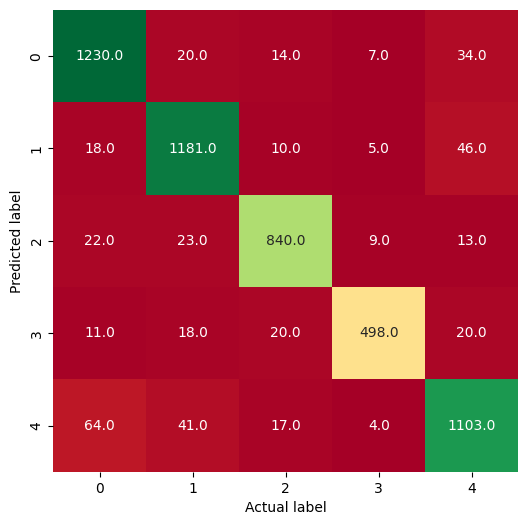

In [186]:
# Visualize Confusion Matrix with heatmap
fig, ax = plt.subplots(figsize=(6, 6))
ax = sns.heatmap(confusion_matrix(y_test, y_pred),
                 annot=True,
                 cbar=False,
                 cmap="RdYlGn", fmt = '0.1f')
plt.xlabel("Actual label")
plt.ylabel("Predicted label")
plt.show()

In [403]:
text = df_clean['complaint_pos']
text = pd.DataFrame(text)
text.rename(columns={'complaint_pos':'name'}, inplace=True)
text



,name
1,morning name stop bank cardmember service ask ...
2,card agent upgrade date agent information orde...
10,card application identity consent service cred...
11,try book ticket offer ticket card information ...
14,son deposit chase account fund bank account pa...
...,...
78303,card customer decade solicitation credit card ...
78309,wednesday credit card provider claim purchase ...
78310,pay risk provide consumer bank app chase mobil...
78311,credit credit card chase freedom problem balan...


In [405]:
cv = CountVectorizer(stop_words='english')

In [406]:
cv.fit(text['name'])

CountVectorizer(stop_words='english')

In [408]:
cv.vocabulary_

{'morning': 9473,
 'stop': 13950,
 'bank': 1238,
 'cardmember': 2090,
 'service': 13192,
 'ask': 912,
 'debt': 3944,
 'verification': 15460,
 'statement': 13855,
 'mail': 8763,
 'month': 9428,
 'right': 12682,
 'information': 7478,
 'consumer': 3244,
 'chase': 2409,
 'account': 100,
 'thank': 14493,
 'advance': 336,
 'help': 6754,
 'card': 2062,
 'agent': 426,
 'upgrade': 15301,
 'date': 3851,
 'order': 10159,
 'change': 2346,
 'consent': 3193,
 'recording': 11970,
 'application': 775,
 'identity': 7143,
 'credit': 3589,
 'applicant': 773,
 'try': 15089,
 'book': 1667,
 'ticket': 14687,
 'offer': 10015,
 'minute': 9184,
 'screen': 13033,
 'decision': 3984,
 'contact': 3260,
 'notification': 9867,
 'representative': 12364,
 'state': 13846,
 'use': 15339,
 'oblige': 9959,
 'request': 12405,
 'fact': 5562,
 'report': 12314,
 'error': 5244,
 'son': 13620,
 'deposit': 4189,
 'fund': 6223,
 'pay': 10482,
 'money': 9389,
 'check': 2500,
 'refuse': 12091,
 'owner': 10329,
 'country': 3486,
 't

In [409]:
dv = pd.DataFrame(cv.vocabulary_, index=range(0,1) )
type(dv)

pandas.core.frame.DataFrame

In [368]:
# sorted(dv, key = lambda x: x[1], reverse=True)

In [410]:
dtm  = cv.fit_transform(text['name'])
dtm.get_shape()

(21072, 16130)

In [411]:
lda = LatentDirichletAllocation(n_components=5)
lda.fit(dtm)

LatentDirichletAllocation(n_components=5)

In [418]:
len(lda.components_), lda.components_.shape

(5, (5, 16130))

In [419]:
single = lda.components_[0]

In [420]:
len(cv.get_feature_names_out()), cv.get_feature_names_out()

(16130,
 array(['_behind', 'aa', 'aaccount', ..., 'zone', 'zoo', 'zoom'],
       dtype=object))

In [421]:
single.argsort()

array([8168, 2306, 3733, ..., 2409, 1238,  100], dtype=int64)

In [422]:
arr = np.array([11,21,20])
arr

array([11, 21, 20])

In [423]:
arr.argsort()

array([0, 2, 1], dtype=int64)

In [424]:
top_10 = single.argsort()[-10:]

In [425]:
for index in top_10:
     print(cv.get_feature_names_out()[index])

deposit
day
number
branch
fund
money
check
chase
bank
account


In [402]:
# import random

# for i in range(10):
#      random_word_id = random.randint(0,3511)
#      print(cv.get_feature_names_out()[random_word_id])


In [398]:
# Creating a function to extract top ngrams(unigram/bigram/trigram) based on the function inputs
def get_top_ngrams(text, n=None, ngram=(1,1)):
  vec = CountVectorizer(stop_words='english', ngram_range=ngram).fit(text)
  bagofwords = vec.transform(text)
  sum_words = bagofwords.sum(axis=0)
  words_frequency = [(word, sum_words[0, index]) for word, index in vec.vocabulary_.items()]
  words_frequency = sorted(words_frequency, key = lambda x: x[1], reverse=True)
  return words_frequency[:n]

In [401]:
top_30words = get_top_ngrams(text['name'].values.astype('U'), n=10, ngram=(1,1))
df_unigram = pd.DataFrame(top_30words, columns=['unigram', 'count'])
df_unigram

,unigram,count
0,account,2496
1,chase,2197
2,credit,1623
3,card,1416
4,bank,1330
5,payment,960
6,time,742
7,charge,682
8,money,600
9,check,542
